# Морфологічні перетворення

У даній лабораторній роботі розглянуто наступні приклади морфологічної обробки зображень
1. Ерозія
2. Діляція
3. Морфологічне відкриття
4. Морфологічне закриття
5. Морфологічний градієнт
6. Ізоляція локальних максимумів
7. Ізоляція темних регіонів

### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Зчитуємо вихідне зображення

In [2]:
img_ref = cv2.imread("./examples/Fig0905a.tif")
img = cv2.imread("./examples/j.png")

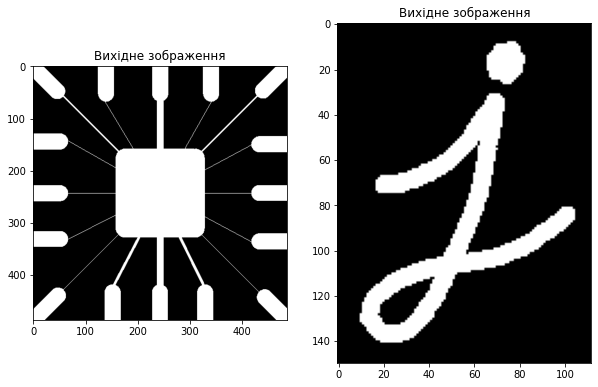

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(img_ref); plt.title('Вихідне зображення'); 
plt.subplot(122);plt.imshow(img); plt.title('Вихідне зображення'); 

plt.show();

### Встановлюємо ядро 

In [5]:
kernel = np.ones((5,5),np.uint8)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


### 1. Ерозія

Основна ідея ерозії подібна до ерозії ґрунту, вона розмиває межі переднього плану. Ядро ковзає по зображенню (як у 2D згортці), піксель у вихідному зображенні (1 або 0) вважатиметься 1 лише в тому випадку, якщо всі пікселі під ядром дорівнюють 1, інакше він еродований (до 0).

Отже, всі пікселі біля межі будуть відкинуті залежно від розміру ядра. Так зменшується товщина або розмір об'єкта переднього плану або просто зменшується біла область зображення. Це корисно для видалення невеликих білих шумів, відокремлення двох з'єднаних об'єктів тощо.

### Синтаксис функці
    erosion = cv2.erode(img,kernel,iterations = 1)
    
Параметри:
* **img** - вхідне зображення;
* **kernel** - ядро ерозії;
* **iterations** -  кількість ітерацій (за замовчуванням 1).

Застосуємо ерозію до вихідного зображення та відобразимо його:

In [6]:
erosion_ref = cv2.erode(img_ref,kernel,iterations = 1)
erosion = cv2.erode(img,kernel,iterations = 1)

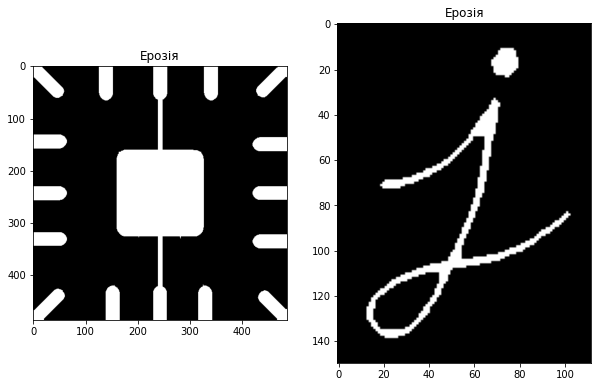

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(erosion_ref); plt.title('Ерозія'); 
plt.subplot(122);plt.imshow(erosion); plt.title('Ерозія'); 

plt.show();

### 2. Діляція

Операція протилежна ерозії. Вихідний піксель буде дорівнювати 1, якщо принаймні один піксель під ядром 1. Таким чином, збільшується область білого на зображенні або збільшується розмір предмета переднього плану. Зазвичай у таких випадках, як видалення шуму, ерозія супроводжується діляцією. Тому що ерозія знімає білі шуми, але також зменшує наш об’єкт. Тож ми її розширюємо. Діляція також корисна при з'єднанні частин предмета.

Зчитаємо та відобразимо вихідне зображення

In [8]:
img_ref = cv2.imread("./examples/Fig0907a.tif")
img = cv2.imread("./examples/j.png")

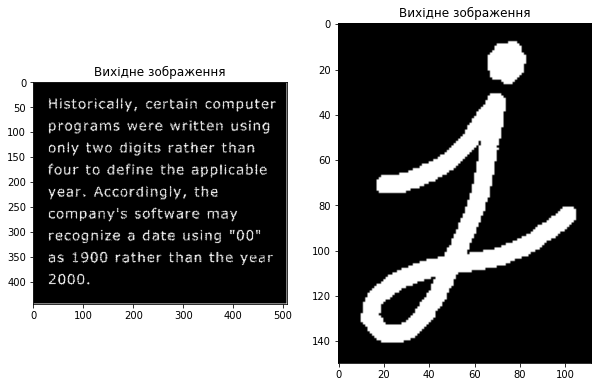

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(img_ref); plt.title('Вихідне зображення'); 
plt.subplot(122);plt.imshow(img); plt.title('Вихідне зображення'); 

plt.show();

### Синтаксис функці
    dilation = cv2.dilate(img,kernel,iterations = 1)
    
Параметри:
* **img** - вхідне зображення;
* **kernel** - ядро ерозії;
* **iterations** -  кількість ітерацій (за замовчуванням 1).

Застосуємо діляцію до вихідного зображення та відобразимо його:

In [10]:
dilation_ref = cv2.dilate(img_ref,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)

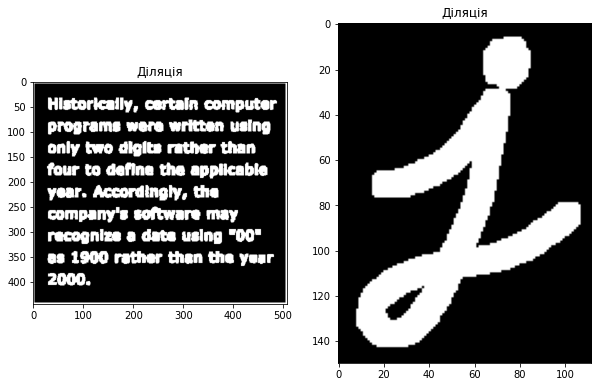

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(dilation_ref); plt.title('Діляція'); 
plt.subplot(122);plt.imshow(dilation); plt.title('Діляція'); 

plt.show();

### 3. Морфологічне відкриття

Відкриття - це лише інша назва ерозії з подальшим розширенням. Це корисно для усунення шуму, як ми пояснили вище.

Зчитаємо та відобразимо зображення:

In [12]:
img_ref = cv2.imread("./examples/Fig0911a.tif")
img = cv2.imread("./examples/j_s&p_w.jpg")

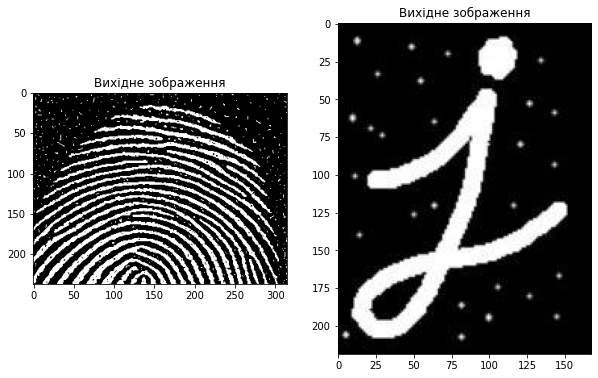

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(img_ref); plt.title('Вихідне зображення'); 
plt.subplot(122);plt.imshow(img); plt.title('Вихідне зображення'); 

plt.show();

#### Встановимо ядро відкриття

In [15]:
kernel_ref = np.ones((3,3),np.uint8)
kernel = np.ones((5,5),np.uint8)

### Синтаксис функці
    opening = cv2.morphologyEx(img, operation, kernel, iterations = 1)
**cv2.morphologyEx** виконує деякі морфологічні перетворення, зазначені в аргументі **operation**
    
Параметри:
* **img** - вхідне зображення;
* **operation** - тип морфологічної операції:
    * **MORPH_OPEN** - операція морфологічного відкриття 
    * **MORPH_CLOSE** - операція морфологічного закриття 
    * **MORPH_GRADIENT** - морфологічний градієнт
    * **MORPH_TOPHAT** - “top hat”
    * **MORPH_BLACKHAT** - “black hat”
    * **MORPH_HITMISS** - “hit and miss”
* **iterations** -  кількість ітерацій (за замовчуванням 1).

Застосуємо діляцію до вихідного зображення та відобразимо його:

In [16]:
opening_ref = cv2.morphologyEx(img_ref , cv2.MORPH_OPEN, kernel_ref)
opening = cv2.morphologyEx(img , cv2.MORPH_OPEN, kernel)

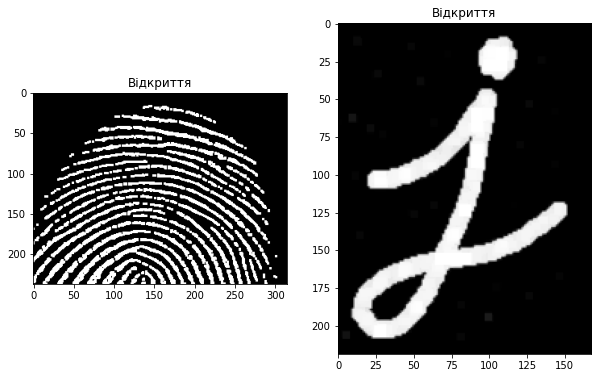

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(opening_ref); plt.title('Відкриття'); 
plt.subplot(122);plt.imshow(opening); plt.title('Відкриття'); 

plt.show();

### 3. Морфологічне закриття

Закриття є зворотним відкриттям, ділатацією, а потім ерозією. Це корисно для закриття невеликих отворів всередині предметів переднього плану або невеликих чорних точок на об’єкті.

Синтаксис функції анологічний до відкриття, за винятком аргумента **operation**

In [18]:
img = cv2.imread("./examples/j_s&p_b.jpg")

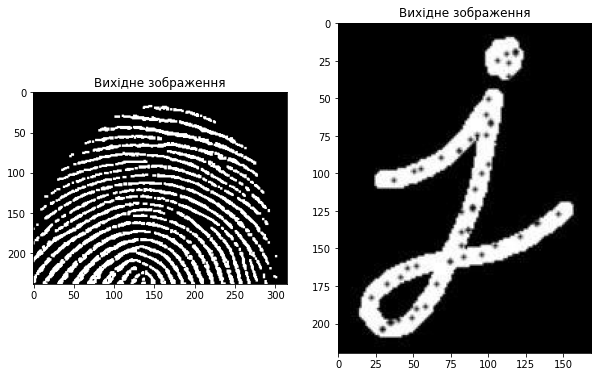

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(opening_ref); plt.title('Вихідне зображення'); 
plt.subplot(122);plt.imshow(img); plt.title('Вихідне зображення'); 

plt.show();

In [20]:
closing_ref = cv2.morphologyEx(opening_ref, cv2.MORPH_CLOSE, kernel_ref)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

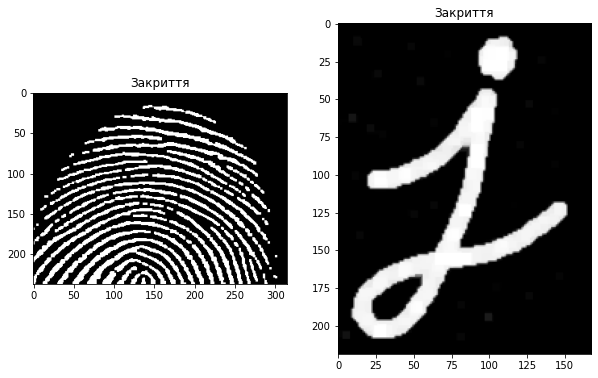

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(closing_ref); plt.title('Закриття'); 
plt.subplot(122);plt.imshow(closing); plt.title('Закриття'); 

plt.show();

### 5. Морфологічний градієнт

Це різниця між дилатацією та ерозією зображення. Результат буде виглядати як контур об’єкта.

Зчитаємо та відобразимо зображення:

In [22]:
img_ref = cv2.imread("./examples/Fig0914a.tif")
img = cv2.imread("./examples/j.png")

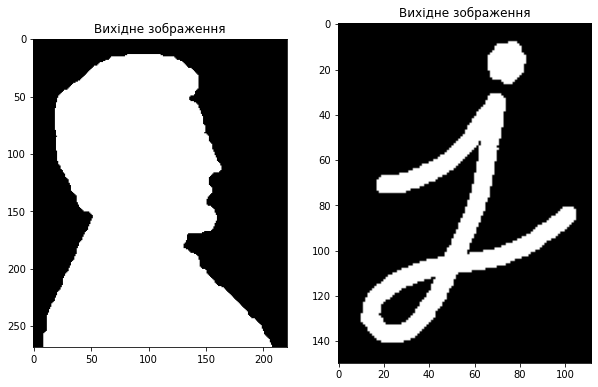

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(img_ref); plt.title('Вихідне зображення'); 
plt.subplot(122);plt.imshow(img); plt.title('Вихідне зображення'); 

plt.show();

Синтаксис функції анологічний до відкриття, за винятком аргумента **operation**

In [24]:
gradient_ref = cv2.morphologyEx(img_ref, cv2.MORPH_GRADIENT, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

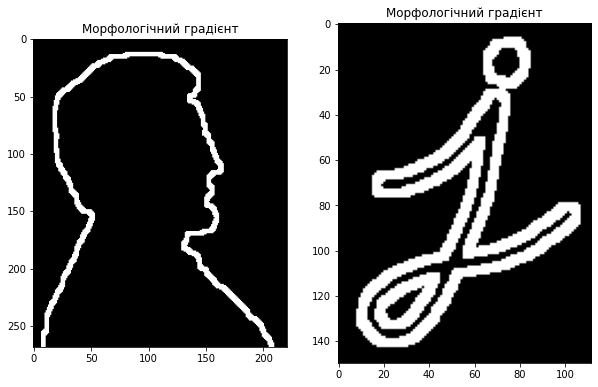

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(gradient_ref); plt.title('Морфологічний градієнт'); 
plt.subplot(122);plt.imshow(gradient); plt.title('Морфологічний градієнт'); 

plt.show();

<h3>6. Top Hat</h3>

Це різниця між вихідним зображенням та відкриттям зображення.

In [26]:
img_ref = cv2.imread("./examples/Fig0916a.tif")

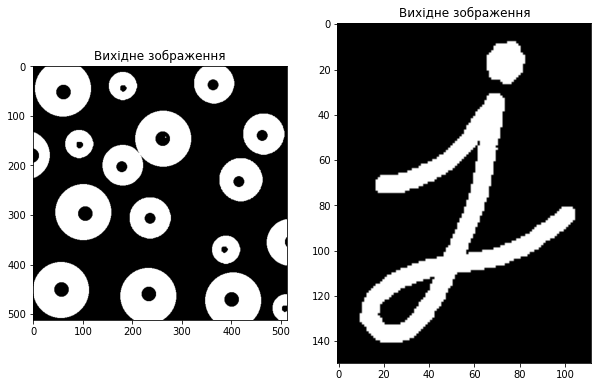

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(img_ref); plt.title('Вихідне зображення'); 
plt.subplot(122);plt.imshow(img); plt.title('Вихідне зображення'); 

plt.show();

#### Встановимо ядро

In [28]:
kernel_ref = np.ones((2,2),np.uint8)
kernel = np.ones((9,9),np.uint8)

Синтаксис функції анологічний до відкриття, за винятком аргумента **operation**

In [29]:
tophat_ref = cv2.morphologyEx(img_ref, cv2.MORPH_TOPHAT, kernel_ref)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

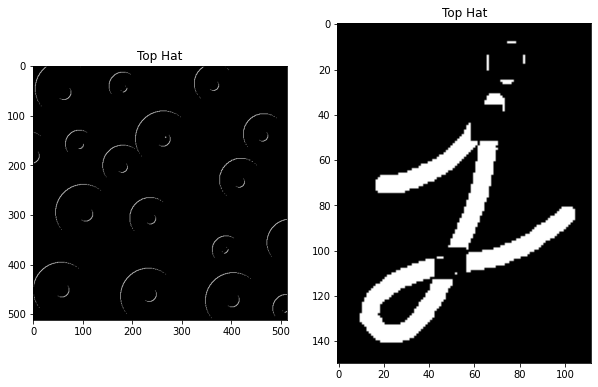

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(tophat_ref); plt.title('Top Hat'); 
plt.subplot(122);plt.imshow(tophat); plt.title('Top Hat'); 

plt.show();

<h3>7. Black Hat</h3>

Це різниця між закриттям вихідного зображення та вхідним зображенням

Синтаксис функції анологічний до відкриття, за винятком аргумента **operation**

In [31]:
blackhat_ref = cv2.morphologyEx(img_ref, cv2.MORPH_BLACKHAT, kernel_ref)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

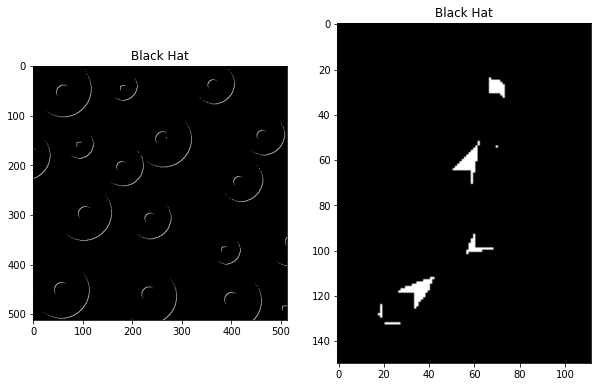

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(blackhat_ref); plt.title('Black Hat'); 
plt.subplot(122);plt.imshow(blackhat); plt.title('Black Hat'); 

plt.show();

# Завдання
## 1. Методами морфологічної обробки збільшити та зменшити контури зображення
1.1 Завантажити та відобразити зображення "1_8.png" директорії "./examples/"

In [42]:
img = cv2.imread("./examples/1_8.png", cv2.IMREAD_GRAYSCALE)

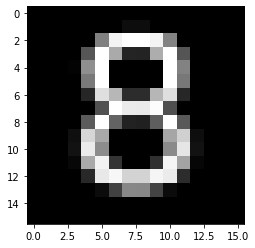

In [44]:
plt.figure()
plt.imshow(img, cmap='gray')
plt.show();

1.2 Створити бінарне зображення (зображення із двома значеннями інтенсивностей - min та max) методом порогової обробки. Як поріг використати значення інтенсивності 10.

In [45]:
bin_img = img.copy()
threshold = 10
max_val = 255
min_val = 0

In [46]:
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            bin_img[row][col] = max_val
        else:
            bin_img[row][col] = min_val

1.3 Відобразити бінарне зображення

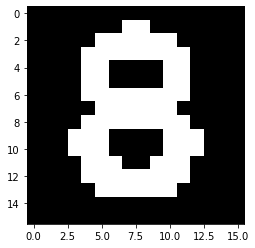

In [47]:
plt.figure()
plt.imshow(bin_img, cmap='gray')
plt.show();

1.4 Встановити ядро розміром 2х2

In [48]:
kernel = np.ones((2,2),np.uint8)

1.5 Застосувати ерозію до бінарного зображення та відобразити його

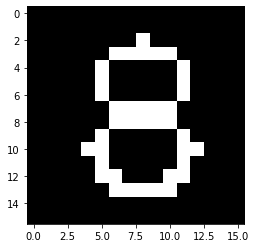

In [50]:
erosion = cv2.erode(bin_img, kernel, 1)

plt.figure()
plt.imshow(erosion, cmap='gray')
plt.show();

1.6 Застосувати діляцію до бінарного зображення та відобразити його

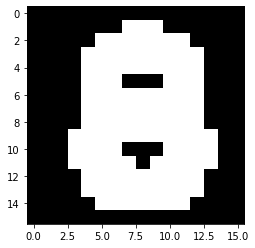

In [52]:
dilation = cv2.dilate(bin_img, kernel, 1)

plt.figure()
plt.imshow(dilation, cmap='gray')
plt.show();

## 2. Методами морфологічної обробки підготувати зображення до подальшої обробки
2.1 Завантажити та відобразити зображення "street.jpg" директорії "./examples/"

In [68]:
img = cv2.imread("./examples/street.jpg", cv2.IMREAD_GRAYSCALE)

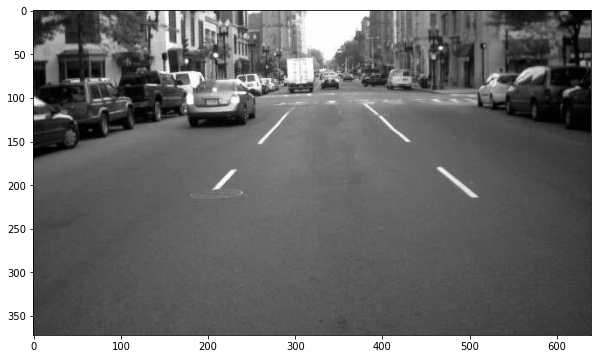

In [69]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show();

2.2 Створити бінарне зображення (зображення із двома значеннями інтенсивностей - min та max) методом порогової обробки. Як поріг використати значення інтенсивності 170.

In [70]:
bin_img = img.copy()
threshold = 170
max_val = 255
min_val = 0

In [71]:
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            bin_img[row][col] = max_val
        else:
            bin_img[row][col] = min_val

2.3 Відобразити бінарне зображення

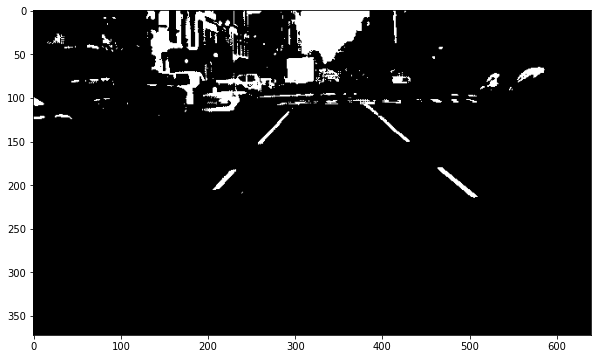

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(bin_img, cmap = 'gray')
plt.show();

2.4 Встановити ядро розміром 2х2

In [73]:
kernel = np.ones((2,2),np.uint8)

2.5 Застосувати ерозію до бінарного зображення та відобразити його

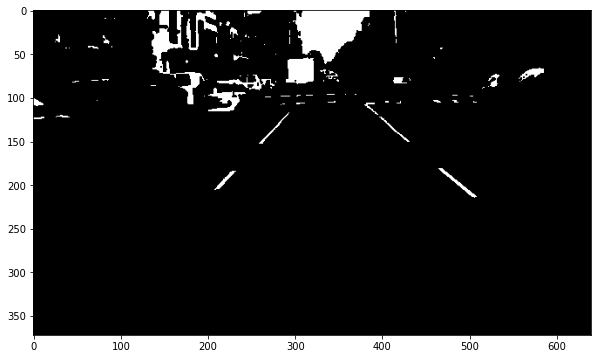

In [74]:
erosion = cv2.erode(bin_img, kernel, 1)

plt.figure(figsize=(10,10))
plt.imshow(erosion, cmap='gray')
plt.show();

2.6 Застосувати морфологічне відкриття до зображження після обробки ерозією та відобразити його

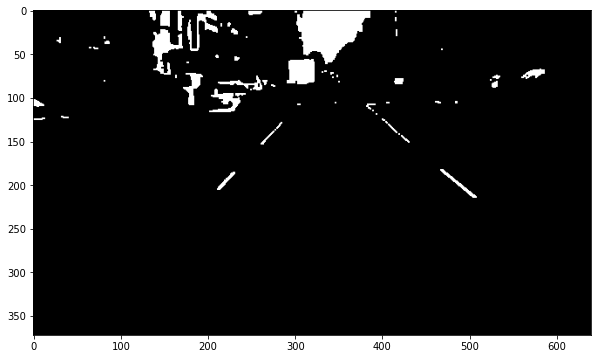

In [75]:
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,10))
plt.imshow(opening, cmap='gray')
plt.show();